In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [75]:
fol = 'collectedfile_mincpg3'
files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')
    
if '.DS_Store' in files:
    files.remove('.DS_Store')

x_col = 'mNeu_real'
y_col = 'true_pos/all_pos'

group_num = 3

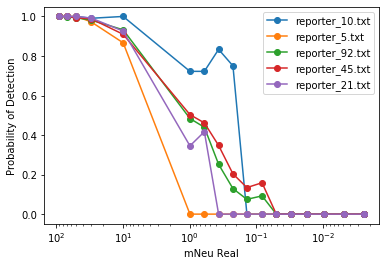

In [76]:
fig, ax = plt.subplots()
for name in files:
    file = fol + '/' + name
    data = pd.read_csv(file, sep='\t')
    df = pd.DataFrame(data)
    df = df.set_index('Mixture')
    df['Index Number'] = [int(i.split('insilmix')[-1]) for i in df.index]
    df.sort_values(['Index Number'], inplace=True)
    df = df.drop('Index Number', axis=1)
    
    x_arr = list(df[x_col])
    y_arr = list(df[y_col])
    
    x_vals = []
    y_vals = []
    
    for j in range(len(y_arr)):
        if y_arr[j] == -1:
            y_arr[j] = 0
    
    for i in range(0, len(x_arr), group_num):
        x_sub = x_arr[i:i+group_num]
        y_sub = y_arr[i:i+group_num]
        
        x_vals.append(np.mean(x_sub))
        y_vals.append(np.mean(y_sub))
    

    x_vals, y_vals = zip(*sorted(zip(x_vals, y_vals)))

    ax.plot(x_vals, y_vals, label=name, marker='o')

ax.set_xscale('log')
ax.invert_xaxis()
ax.set_xlabel('mNeu Real')
ax.set_ylabel('Probability of Detection')
plt.legend()

In [73]:
fig.savefig('mincpg3_correlation.pdf',dpi=300, bbox_inches='tight')